In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from apify_client import ApifyClient
import networkx as nx
import os

In [9]:
dados = pd.read_json('resultsUFSJ.json')

'ufsjbr'

## Combinando redes

In [15]:
def extrair_usuario(url):
    return url.split('.com/')[1].strip('/')

In [29]:
for file in os.listdir(): 
    if file.endswith('.json'):
        print(file)
        dados = pd.read_json(file)

        nomes_usuarios = []

        for it in dados['latestComments'].items():
            for comments in it[1]:
                #print(comments['ownerUsername'])
                nomes_usuarios.append(comments['ownerUsername'])

        arestas = []
        for usuario in nomes_usuarios: 
            arestas.append((usuario, extrair_usuario(dados['inputUrl'][0])))

        try: 
            grafo = nx.read_gml('grafo.gml')
            #print(grafo)
        except Exception:
            #print('entrei no except')
            grafo = nx.DiGraph()
        
        

        grafo.add_edges_from(arestas)
        nx.write_gml(grafo, path = 'grafo.gml')
        #print(grafo)
    

results1.json
resultsUaiRango.json
resultsUFSJ copy.json
resultsUFSJ.json
resultsPopNews.json


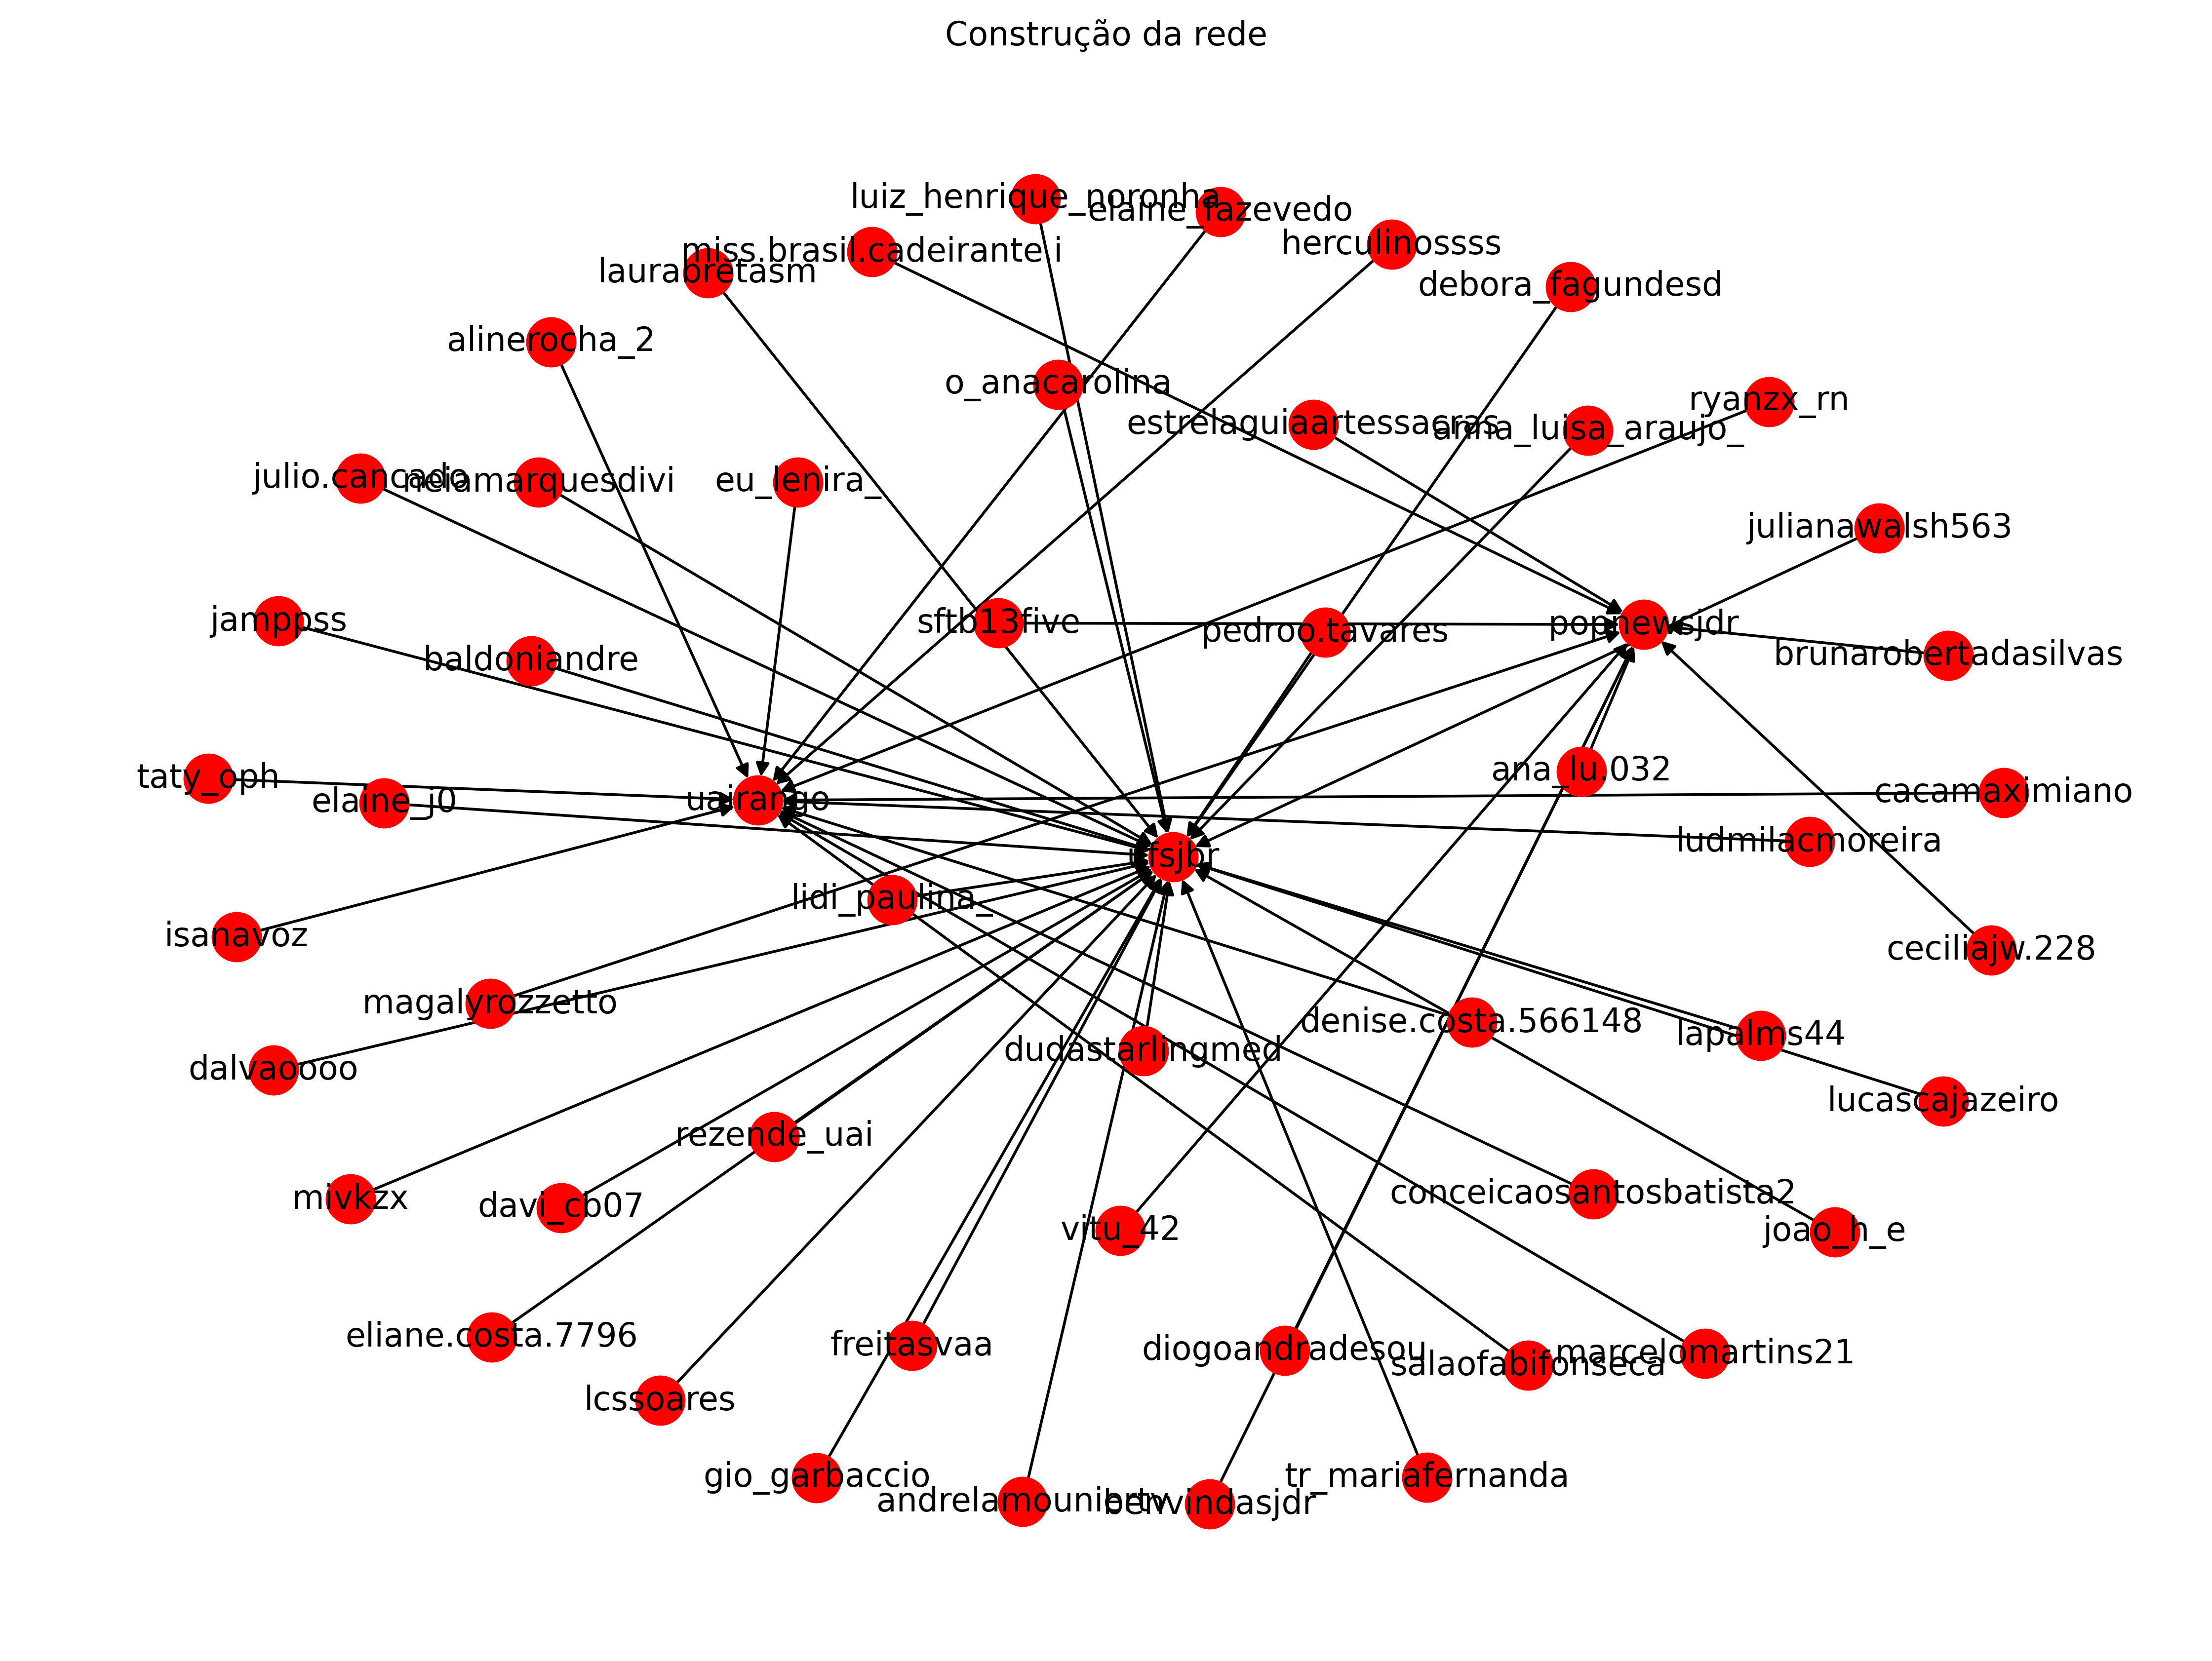

In [45]:
plt.figure(figsize=(11, 8), dpi = 400)
pos = nx.arf_layout(grafo)
nx.draw(grafo, 
        pos = pos, 
        with_labels = True,
        node_color = 'red')
plt.title("Construção da rede")
plt.savefig('construcao_rede.png', dpi = 400)